In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split

In [2]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
class Linear:
    def __init__(self, flag=True, theta=None):
        self.flag = flag
        self.theta = theta

    def fit(self, X, Y):
        if X is None or Y is None:
            raise ValueError('数据错误, X 或 Y 为空!')

        Y = np.array(Y).reshape((-1, 1))
        X = np.mat(X)
        Y = np.mat(Y)

        if self.flag:
            X = np.column_stack((X, np.ones(shape=(X.shape[0], 1))))

        self.theta = ((X.T * X).I * X.T * Y)

    def predict(self, X):
        if X is None:
            raise ValueError('数据错误, X 为空!')

        if self.flag:
            X = np.column_stack((X, np.ones(shape=(X.shape[0], 1))))
        return X * self.theta

In [4]:
data = pd.read_csv('../datas/boston_housing.data', sep='\s+', header=None)
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

xTarin, xTest, yTarin, yTest = train_test_split(X, Y, test_size=0.3, random_state=10)

linear = Linear(flag=True)

linear.fit(xTarin, yTarin)
print(linear.theta)

[[-1.53776087e-01]
 [ 6.50159270e-02]
 [-2.42597326e-02]
 [ 1.62203309e+00]
 [-1.52999306e+01]
 [ 3.35196668e+00]
 [ 1.13259963e-02]
 [-1.54810871e+00]
 [ 3.02641886e-01]
 [-1.22317535e-02]
 [-8.11539044e-01]
 [ 1.29504798e-02]
 [-5.44861583e-01]
 [ 3.42448370e+01]]


In [5]:
y_train_hat = linear.predict(xTarin)
yPredict = linear.predict(xTest)


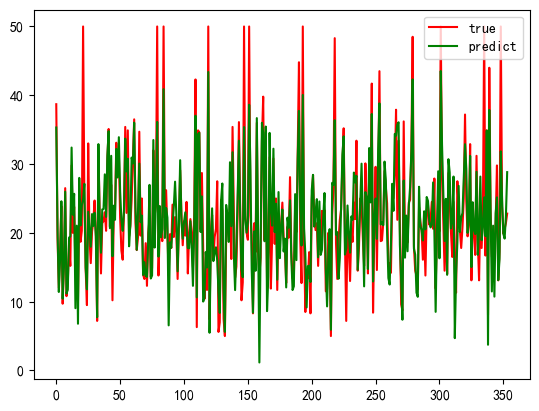

In [6]:
# 训练集
plt.plot(range(len(xTarin)), yTarin, 'r', label=u'true')
plt.plot(range(len(xTarin)), y_train_hat, 'g', label=u'predict')
plt.legend(loc='upper right')
plt.show(block=True)

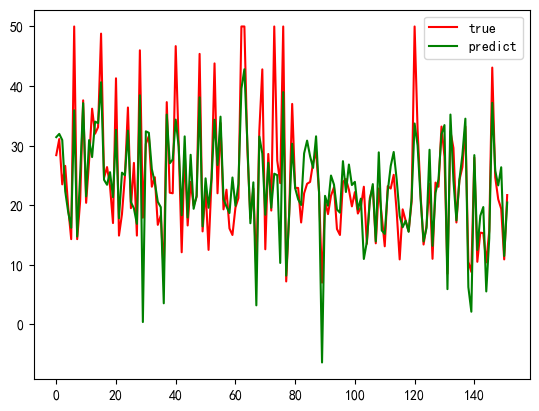

In [7]:
# 测试集
plt.plot(range(len(xTest)), yTest, 'r', label=u'true')
plt.plot(range(len(xTest)), yPredict, 'g', label=u'predict')
plt.legend(loc='upper right')
plt.show(block=True)